<h1 style="text-align:center;font-size:50px">Automated Luggage Checker</h1>

<h3>1) Cloning the DarkNet repository</h3>

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 13229 (delta 1), reused 2 (delta 0), pack-reused 13221
Receiving objects: 100% (13229/13229), 11.92 MiB | 12.47 MiB/s, done.
Resolving deltas: 100% (9044/9044), done.


<h3>2) Making changes in the makefile</h3>

In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


**Finding out CUDA version**

In [3]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


<h3>3) Making changes in detector.c file in DarkNet repo</h3>

The detector.c file has a function - void train_detector(). This function trains the network & saves the weights in the backup folder after every 100 epochs.
<br>

I have made a few changes in this function so as to save weights after every 500 epochs.

<img src="https://raw.githubusercontent.com/subhromitra/Automated-Luggage-Checker/master/detector.c_changes.JPG">

In [ ]:
# make command compiles all files.
! make

<h3>Utility functions for viewing Yolo's detections</h3>

In [0]:
# Utility functions
import cv2
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

# define helper functions
def imShow(path):

  image = cv2.imread(path)

  if image is None:
        print("{} was not found".format(path))
        return
    
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [0]:
! pwd

/content/darknet


<h3>5) Bring training images from drive to VM.</h3>

In [0]:
# Mount google drive to save YOLO weights while it trains, so that in any unfortunate event U can resume training from where U left.
from google.colab import drive
drive.mount('/content/drive')

<h3>6) Making few naming changes for convenience</h3>

In [0]:
# Now instead of writing /content/gdrive/My Drive/    U can write /mydrive
# Its called having a symbolic link.
! ln -s /content/drive/My\ Drive/ /my_drive 

In [0]:
# Creating Train folder - Images & annotations are stored here.
! mkdir /content/Train

<h3>Copying the Train.rar file in newly created Train directory</h3>

Train.rar file contains the training images & their respective annotations.

In [0]:
! cp /my_drive/prohibitory_item_detection/Train.rar /content/Train

In [10]:
cd /content/Train

/content/Train


In [11]:
! pwd

/content/Train


In [ ]:
# Extracting contents from the .rar file
! unrar e /content/Train/Train.rar /content/Train

In [0]:
# Removing the .rar file
! rm -r /content/Train/Train.rar

<h3>4) Fetching the pre-trained weights</h3>

In [15]:
cd /content/darknet

/content/darknet


In [0]:
! wget https://pjreddie.com/media/files/darknet53.conv.74 

--2020-05-02 04:18:13--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   717KB/s    in 4m 39s  

2020-05-02 04:22:54 (568 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
# Moving the weights file in backup folder that I had created in my Google Drive
! cp /content/darknet/darknet53.conv.74 /my_drive/prohibitory_item_detection/yolo_weights_backup

In [17]:
cd /my_drive/prohibitory_item_detection/yolo_weights_backup

/content/drive/My Drive/prohibitory_item_detection/yolo_weights_backup


In [0]:
! mv darknet53.conv.74 yolov3_custom_last.weights

In [18]:
! ls

yolov3_custom_last.weights


In [19]:
cd /content/darknet

/content/darknet


In [20]:
# ./darknet is an executable file. Running the below command will check whether everything is fine or not.
# If everything is fine it should show :-  usage: ./darknet <function>
! ./darknet

usage: ./darknet <function>


<h3>7) Training a Custom YOLOv3 Object Detector</h3>

<br>

<h3>Requirements :-</h3> 

1) **train.txt** file - Contains complete path for all training images. For e.g:-

<img src="https://raw.githubusercontent.com/subhromitra/Automated-Luggage-Checker/master/traintxt_img.JPG">

<br>

2) **obj.names** file - This file contains the name of all object classes to be used for training. They have to be in the order in which the label for annotations were done, i.e, if Pen was given label-1 (one) in the annotations then Pen should be kept second in obj.data file. Contents :-

<img src="https://raw.githubusercontent.com/subhromitra/Automated-Luggage-Checker/master/objnames_img.JPG">

<br>

3) **obj.data** file - Contents :-

<img src="https://raw.githubusercontent.com/subhromitra/Automated-Luggage-Checker/master/objdata_img.JPG">

<br>

<h4>Place all of the above files in darknet/data folder</h4>

<br>

4) **Custom configuration file** :- 

Here its named **yolov3_custom.cfg** file. Take the yolov3.cfg file & make changes as needed , for e.g - changing no.of classes, batch size etc. Place this file in **darknet/cfg** folder.

<br>

**TIP** : This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service shuts down it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit Enter :-

<pre>
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
</pre>

In [ ]:
# Train darknet detector
! ./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom.cfg /my_drive/prohibitory_item_detection/yolo_weights_backup/yolov3_custom_last.weights -dont_show

<h3>8) Run custom detector</h3>

In [22]:
# need to set custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

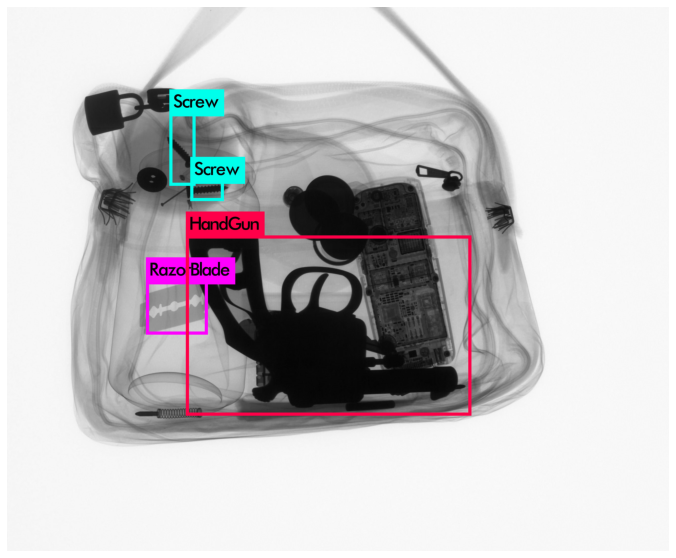

In [23]:
# run custom detector with this command 
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /my_drive/prohibitory_item_detection/yolo_weights_backup/yolov3_custom_last.weights /content/B0048_0016.png 
imShow('predictions.jpg')